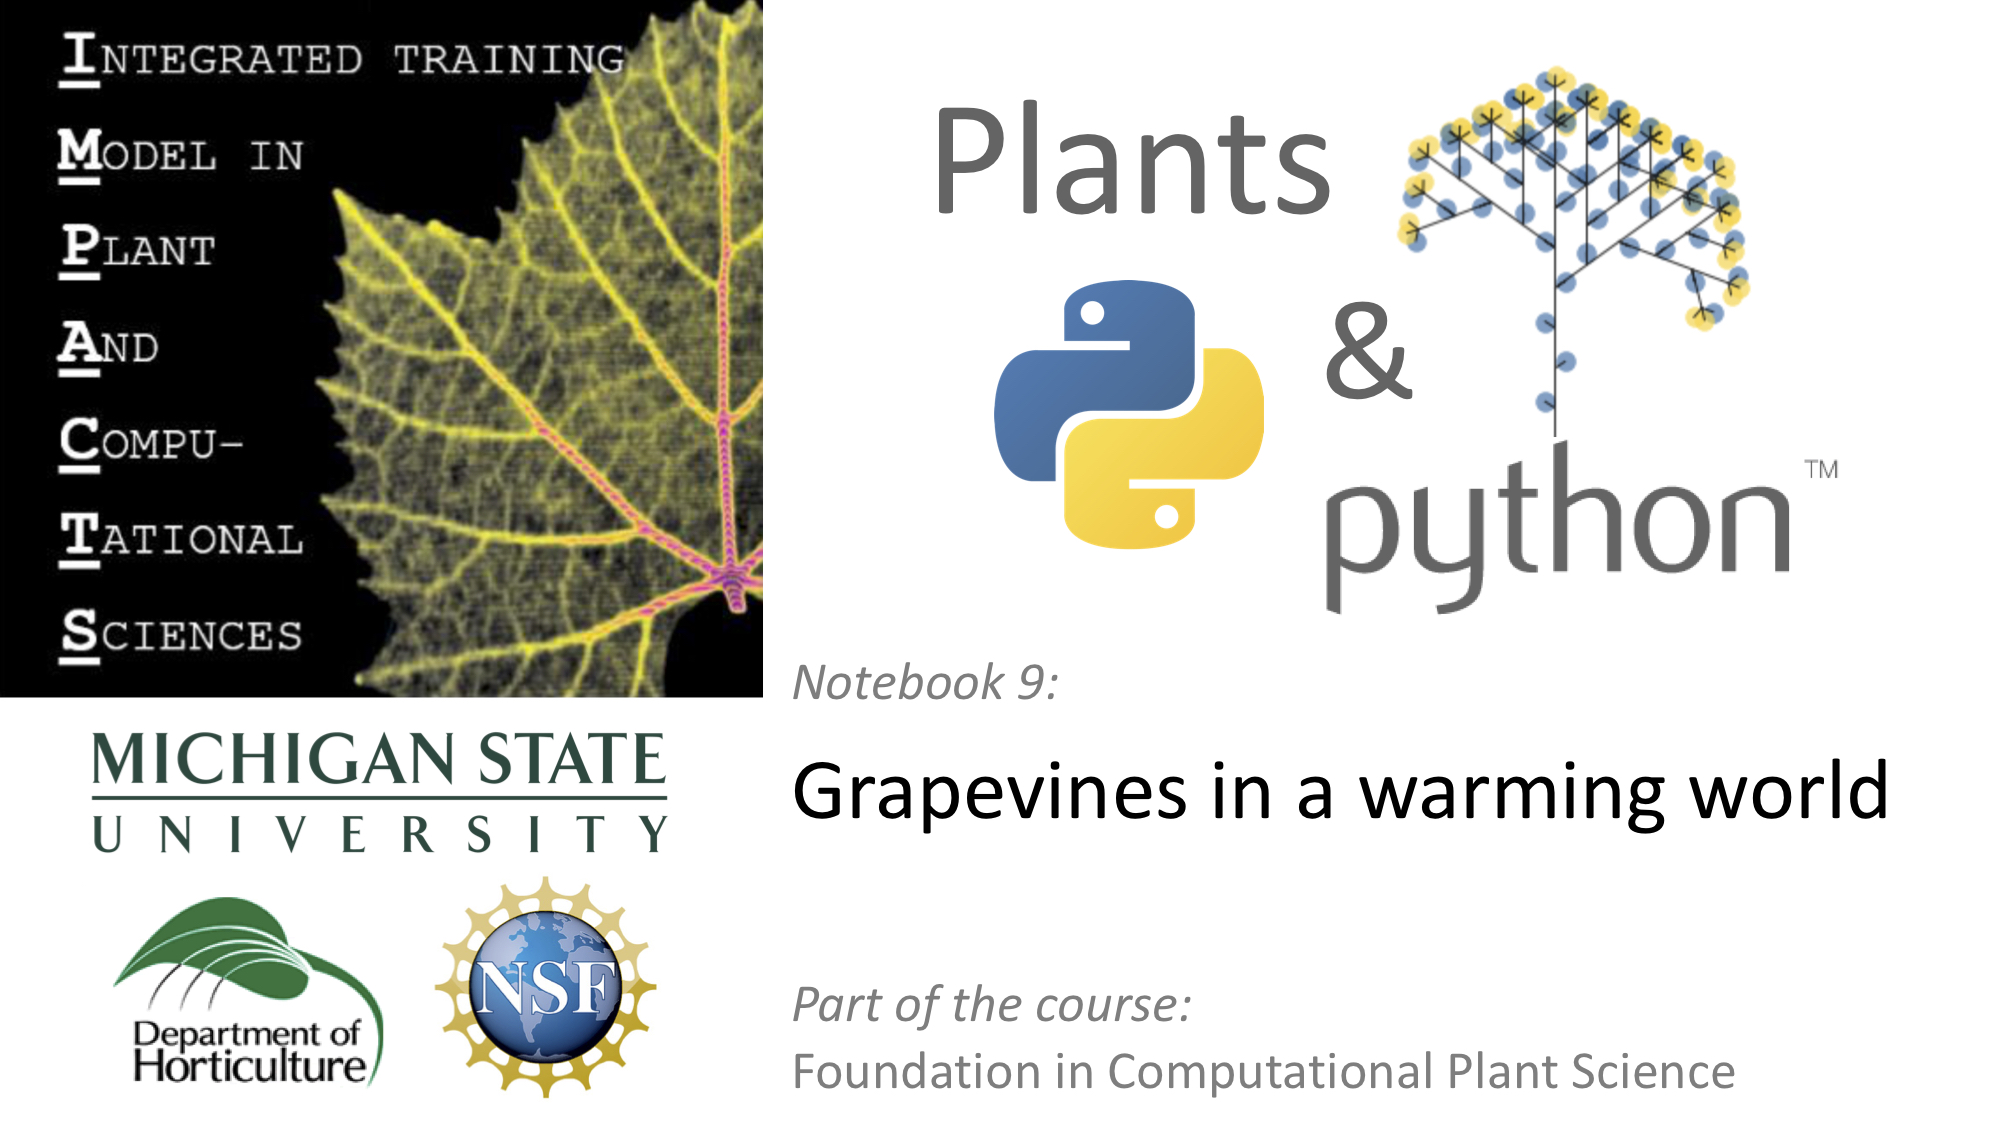

____
# Grapevines in a warming world

In the previous lessons, we have been focusing on learning the nuts and bolts of Python: lists, matplotlib, loops, Boolean statements, if statements, dictionaries, and functions. We used these to make models of phyllotaxy, fractal fern fronds, and branching inflorescences using L-systems.

Now, we shift our focus from formal coding and modeling to data analysis. Data analysis means dataframes, pandas, and seaborn!

Often, your data will be a lot like an Excel spreadsheet, with rows, columns, and column headers. But we need more functionality than Excel can provide. That's where pandas comes in. Pandas is a lot like the Python version of R, which means that it is built to use dataframes and has a lot of built-in statistical capabilities. For plotting, Seaborn is a Python graphing module that, although lacking the versatiity of matplotlib, is built for graphing with statistical needs in mind.

We can't cover all that pandas does in a few notebooks. But as you continue your studies and need to do something specific with respect to data wrangling or analysis, there are many [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) (including a [cheatsheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)) that will certainly have what you need. And of course, google your question!

The best way to use Seaborn is to gaze the [gallery of plots](https://seaborn.pydata.org/examples/index.html) and select what you need! The documentation and examples will be there.

Watch the video below to get started using pandas and seaborn. We will be analzying a dataset examining harvest dates in European grapevines with respect to a warming climate later in the notebook. So, in this video, we will be looking at measurements of CO2 levels in ppm from the [Mauna Loa Observatory in Hawaii](https://www.co2levels.org/#sources). You can download the dataset used in the video [here](https://github.com/DanChitwood/PlantsAndPython/blob/master/co2_mlo_weekly.csv).

Pay attention to the following points:

* How to read in a dataframe using `pandas`
* How to quickly assess dataframe properties
* How to select columns of a dataframe
* How to perform descriptive statistics using `pandas`
* How to mask data
* How to use `.iloc` to isolate data within a dataframe
* Plotting with `seaborn`

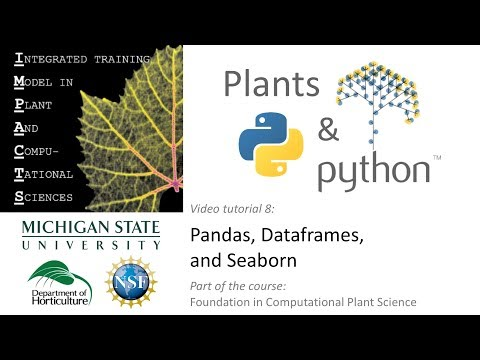

In [33]:
# Imports the functionality that we need to display YouTube videos in a Jupyter notebook.  
# You need to run this cell before you run ANY of the YouTube videos.
from IPython.display import YouTubeVideo

# Watch this video to learn about Pandas, Dataframes, and Seaborn
YouTubeVideo("SR-pTl5MAYE",width=640,height=360)

---
## Data exploration

### Loading and inspecting the data

After visiting Traverse City and sampling Michigan wines, you decide that you would like to start a vineyard in Michigan. You've seen the vineyards in Traverse City and know that, although it is possible to grow wine grapes there, that sometimes it is too cold. You wonder if because of climate change, Michigan might soon have a warmer, more suitable climate for growing grapes. 

You know that Europe has a long history of growing grapes, and you wonder if they kept records that might indicate how grapes respond to changes in temperature. You find a [study](https://www.clim-past.net/8/1403/2012/cp-8-1403-2012.pdf) that has compiled numerous records of grape harvest dates for more than four centuries and also a [database](http://www.climatemonitor.it/?page_id=40210&lang=en) of temperature anomalies in Europe dating back to 1655.

Using the provided dataset, `grape_harvest.csv` (download [here](https://github.com/DanChitwood/PlantsAndPython/blob/master/grape_harvest.csv)), you're going to explore how the European grape harvest date changes with respect to temperature across centuries of data.

To get started, you should include import commands for `pyplot`, `numpy`, and `pandas`. Don't forget to include the command for making sure any plots you create will show up in your notebook!

In [ ]:
# Put import commands here




In [43]:
### ANSWER ###

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Then, read in `grape_harvest.csv` using the `pd.read_csv()` function a pandas dataframe.

In [ ]:
# Read in the grape harvest data here
# Put grape_harvest.csv in the same directory you are running this .ipynb from
# If in a different directory, you will need to specify the path to the file




In [44]:
### ANSWER ###

# Read in the grape harvest data here
data = pd.read_csv("grape_harvest.csv")

Now, write some code to inspect the properties of the data and then answer the following questions:

Use a pandas function to look at the first five lines of data:

In [ ]:
# Put your code here




In [45]:
### ANSWER ###
data.head()

,year,region,harvest,anomaly
0,1700,alsace,42.9,-0.91
1,1701,alsace,35.9,-0.76
2,1702,alsace,45.0,-1.40
3,1703,alsace,49.4,-1.21
4,1704,alsace,30.4,-0.44


Use a pandas function to look at the last five lines of data:

In [ ]:
# Put your code here




In [46]:
### ANSWER ###
data.tail()

,year,region,harvest,anomaly
4727,1873,vendee_poitou_charente,32.0,0.06
4728,1874,vendee_poitou_charente,2.0,-0.22
4729,1875,vendee_poitou_charente,29.0,-1.02
4730,1876,vendee_poitou_charente,32.0,-0.55
4731,1877,vendee_poitou_charente,34.0,-0.56


Use a pandas function to look at summary statistics (like the count, min, max, and mean) for columns with continuous data:

In [ ]:
# Put your code here




In [47]:
### ANSWER ###
data.describe()

,year,harvest,anomaly
count,4732.000000,4732.000000,4732.000000
mean,1832.835376,33.959510,-0.337811
std,91.713152,11.807714,0.675309
min,1655.000000,-13.000000,-2.470000
25%,1762.000000,25.900000,-0.750000
50%,1834.500000,34.000000,-0.280000
75%,1903.000000,42.600000,0.060000
max,2007.000000,75.000000,1.460000


Use a pandas function to retrieve the names of the columns. 

In [ ]:
# Put your code here




In [48]:
### ANSWER ###
data.columns

Index(['year', 'region', 'harvest', 'anomaly'], dtype='object')

For one of the columns that is a categorical variable, use a function to list all the levels for that variable.

In [ ]:
# Put your code here




In [49]:
### ANSWER ###
data['region'].unique()

array(['alsace', 'auvergne', 'auxerre_avalon', 'beaujolais_maconnais',
       'bordeaux', 'burgundy', 'champagne_1', 'champagne_2',
       'gaillac_south_west', 'germany', 'high_loire_valley',
       'ile_de_france', 'jura', 'languedoc', 'low_loire_valley',
       'luxembourg', 'maritime_alps', 'northern_italy',
       'northern_lorraine', 'northern_rhone_valley', 'savoie',
       'southern_lorraine', 'southern_rhone_valley', 'spain',
       'switzerland_leman_lake', 'various_south_east',
       'vendee_poitou_charente'], dtype=object)

For the categorical variable, also use a function to determine how many rows there are representing each level.

In [ ]:
# Put your code here




In [50]:
### ANSWER ###
data['region'].value_counts()

switzerland_leman_lake    353
burgundy                  350
southern_rhone_valley     333
jura                      306
ile_de_france             302
bordeaux                  274
alsace                    262
languedoc                 233
spain                     231
low_loire_valley          203
champagne_2               183
germany                   165
northern_italy            156
maritime_alps             136
auxerre_avalon            128
northern_lorraine         127
northern_rhone_valley     126
savoie                    123
southern_lorraine         109
luxembourg                107
high_loire_valley          92
various_south_east         82
champagne_1                81
auvergne                   80
vendee_poitou_charente     75
beaujolais_maconnais       73
gaillac_south_west         42
Name: region, dtype: int64

How many rows are in this dataset?

In [ ]:
# Put your code here




In [51]:
### ANSWER ###
print(len(data))

4732


____
## Masking

### Determining the earliest and latest harvest dates and where they occurred

We'll start off our exploration of grape harvest dates by figuring out when and where the earliest and latest harvest dates occurred.

The pandas dataframe you just created should have four columns, which are:

* **'year'**: the year the data was collected
* **'region'**: the region in Europe that the data was collected from
* **'harvest'**: the harvest date recorded. Harvest date is defined as number of days after August 31st. A negative number means the grapes were harvested before August 31st that year, and a positive number after.
* **'anomaly'**: the temperature anomaly. For a given year, this number represents how much colder (negative) or hotter (positive) Europe was compared to a long term reference value, in degrees Celsius

Below, print out statements answering the following questions using masking techniques that you have learned:

1) **Which year did the earliest harvest happen, which region did it occur in, and how early was the harvest?**

2) **Which year did the latest harvest happen, which region did it occur in, and how late was the harvest?**

**Hint**: Remember, a mask is a Boolean statement. But that Boolean statement can be combined with pandas functions, like .min() or .max().

**Second hint**: After implementing your mask, you can append to it the .values() function within your print statement. This will allow you to print the values retrieved using your mask.

In [ ]:
# Put your code here to print which year the earliest harvest occured,
# the region it occurred in, and how early the harvest was




In [ ]:
# Put your code here to print which year the latest harvest occured,
# the region it occurred in, and how late the harvest was




In [52]:
### ANSWER ###
print("The earliest harvest date was in the year")
print(data['year'][data['harvest'] == data['harvest'].min()].values)
print("and was from the region")
print(data['region'][data['harvest'] == data['harvest'].min()].values)
print("and it was")
print(data['harvest'].min(), "days before August 31st")

The earliest harvest date was in the year
[1822]
and was from the region
['champagne_2']
and it was
-13.0 days before August 31st


In [53]:
### ANSWER ###
print("The latest harvest date was in the year")
print(data['year'][data['harvest'] == data['harvest'].max()].values)
print("and was from the region")
print(data['region'][data['harvest'] == data['harvest'].max()].values)
print("and it was")
print(data['harvest'].max(), "days after August 31st")

The latest harvest date was in the year
[1851]
and was from the region
['luxembourg']
and it was
75.0 days after August 31st


### Finding median harvest dates in 50 year intervals

You want to know if the grape harvest date is changing, and if so, is it getting earlier or later?

You decide that you would like to know the median grape harvest date for the following 50 year intervals, as well as the median since the year 2000:

* 1800-1849
* 1850-1899
* 1900-1949
* 1950-1999
* 2000-2007

**For each of the above intervals, calculate the median grape harvest date. For each interval print out statements saying "The median harvest date for years (*insert interval here*) is: x."**

**Is the harvest date for grapes getting earlier or later?**


In [ ]:
# Put your code here




In [54]:
### ANSWER ###

median_1800_1849 = data['harvest'][ (data['year'] >= 1800) & (data['year'] <= 1849) ].median()
median_1850_1899 = data['harvest'][ (data['year'] >= 1850) & (data['year'] <= 1899) ].median()
median_1900_1949 = data['harvest'][ (data['year'] >= 1900) & (data['year'] <= 1949) ].median()
median_1950_1999 = data['harvest'][ (data['year'] >= 1950) & (data['year'] <= 1999) ].median()
median_2000_2007 = data['harvest'][ (data['year'] >= 2000) & (data['year'] <= 2007) ].median()

print("The mean harvest date from 1800_1849 was", median_1800_1849)
print("The mean harvest date from 1850_1899 was", median_1850_1899)
print("The mean harvest date from 1900_1949 was", median_1900_1949)
print("The mean harvest date from 1950_1999 was", median_1950_1999)
print("The mean harvest date from 2000_2007 was", median_2000_2007)



The mean harvest date from 1800_1849 was 35.95
The mean harvest date from 1850_1899 was 33.8
The mean harvest date from 1900_1949 was 27.9
The mean harvest date from 1950_1999 was 28.0
The mean harvest date from 2000_2007 was 19.9


____
## Visualization and correlation

Now that you understand a bit about the overall trends in the data, you want to examine other factors that might influence grape harvest date besides historical changes in climate.

You see that the data comes from many regions, all the way from sunny Spain to Germany. You wonder if these latitudinal differences would have any effect on the grape harvest dates.

**Make a boxplot comparing the distributions of grape harvest dates where the x-axis is "region" and the y-axis "harvest". The regions will be ordered by latitude, from the most southern to northern. This will allow you to assess visually if latitude is affecting grape harvest date.**

Your plot should:

1. include axis labels
2. have a title
3. use the seaborn plot style (you need to import the package and then "set" the style)
4. keep the figure size and x ticks commands provided in the code below
5. finally, arrange the regions by latitude, from the most southern to the most northern. To do this, use the provided list `latitude_order`. Within the seaborn boxplot function, specify the `order` argument as follows: `order = latitude_order`. This will arrange the regions in your boxplot from the most southern to northern.


In [ ]:
## DO NOT DELETE THE PROVIDED LINES OF CODE
## (they are included to make sure you get decent looking plots)
plt.figure(figsize=(15,4))

#a list of regions, from the most southern to northern 
latitude_order = ['spain','maritime_alps','languedoc','various_south_east',
                  'gaillac_south_west','southern_rhone_valley','bordeaux',
                  'northern_rhone_valley','auvergne','savoie','northern_italy',
                  'beaujolais_maconnais','vendee_poitou_charente','switzerland_leman_lake',
                  'jura','high_loire_valley','low_loire_valley','burgundy','auxerre_avalon',
                  'champagne_2','southern_lorraine','alsace','northern_lorraine',
                  'germany','ile_de_france','champagne_1','luxembourg'] 
                    
# Put your code here

plt.xticks(rotation=90) #Rotates x axis labels so that they are readable


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

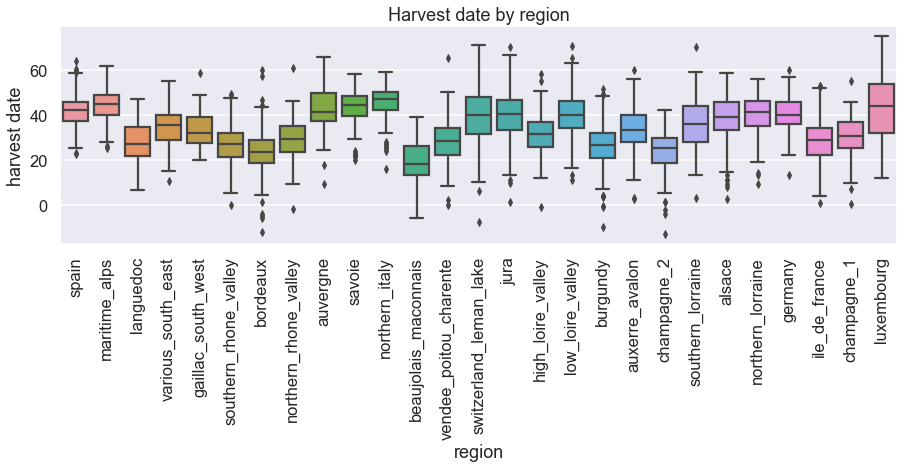

In [55]:
### ANSWER ###
plt.figure(figsize=(15,4))

import seaborn as sns
sns.set("talk") # They can just use the normal seaborn styling if they want, or they can choose something

latitude_order = ['spain','maritime_alps','languedoc','various_south_east','gaillac_south_west','southern_rhone_valley','bordeaux','northern_rhone_valley','auvergne','savoie','northern_italy','beaujolais_maconnais','vendee_poitou_charente','switzerland_leman_lake','jura','high_loire_valley','low_loire_valley','burgundy','auxerre_avalon','champagne_2','southern_lorraine','alsace','northern_lorraine','germany','ile_de_france','champagne_1','luxembourg']

sns.boxplot(x = data['region'], y = data['harvest'], order=latitude_order)
plt.xlabel("region")
plt.ylabel("harvest date")
plt.title("Harvest date by region")
plt.xticks(rotation=90)

**Based on your graph, do you believe that latitude affects the harvest date?** Explain your reasoning. If harvest date changes going south to north, how does this impact your analysis of the effect of history and climate change on harvest date? If harvest date is not affected by latitude, what are the implications for your analysis then?

### Looking for correlation in harvest date between Burgundy and Switzerland

You wonder if the grape harvest dates in different regions are correlated with each other. Two regions with some of the longest records of grape harvest dates are Burgundy ("burgundy") and Switzerland ("switzerland_leman_lake"). You would like to examine the correlation between the grape harvest dates at these two locations. But first, you need to make sure there is a matching grape harvest date for every year between these regions.

Your task below is to:

**1. Create two masked dataframes, one named "burgundy" with only "burgundy" data and the other named "switzerland", with only "switzerland_leman_lake" data.**

**2. Then, using the "merge" function code provided below, create a dataset where every year of recorded "burgundy" data has a matching year or recorded "switzerland" data. Be sure to inspect the column names**

**3. Using your new merged dataframe named "burgundy_switzerland", print out the earliest and latest year in your new merged data.**

In [ ]:
# DO NOT DELETE THE PROVIDED CODE FOR MERGING DATAFRAMES

# Below this point, first create two masked datasets, "burgundy" and "switzerland", that contain only the data for 
# "burgundy" and "switzerland_leman_lake" regions, respectively by using masks

# Put your code here for the "burgundy" and "switzerland" masked dataframes


# After creating your masked dataframes above, use the merge function below to create a single dataframe
# Check the column names of your new merged dataset. The "burgundy" data will have "x" after it and the
# "switzerland" data "y". "year" will have neither "x" nor "y" because it is shared between the dataframes

burgundy_switzerland = burgundy.merge(switzerland, on='year')
print(burgundy_switzerland.columns)

# Next, find the minimum and maximum years represented in this new merged dataset
# Below, print out statements of what the earliest and latest years are

# Put your code here for the minimum and maximum years in your merged "burgundy_switzerland" dataframe



In [56]:
### ANSWER ###

burgundy = data[ data['region'] == 'burgundy' ]
switzerland = data[ data['region'] == 'switzerland_leman_lake' ]

burgundy_switzerland = burgundy.merge(switzerland, on='year')
print(burgundy_switzerland.columns)

min_year = burgundy_switzerland['year'].min()
max_year = burgundy_switzerland['year'].max()

print("The earliest year in this data is", min_year, "and the latest year in this data is", max_year)



Index(['year', 'region_x', 'harvest_x', 'anomaly_x', 'region_y', 'harvest_y',
       'anomaly_y'],
      dtype='object')
The earliest year in this data is 1655 and the latest year in this data is 2006


Now that you have data that is matched, with exactly one "burgundy" and one "switzerland_leman_lake" observation for each year, you can examine if the grape harvest dates are correlated.

Using the seaborn `jointplot()` function (documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html)), make a scatterplot with distributions on the sides to look at this correaltion. **Make sure that your plot includes the regression line!**

In [ ]:
### Put your code here




Text(14.625, 0.5, 'Switzerland harvest')

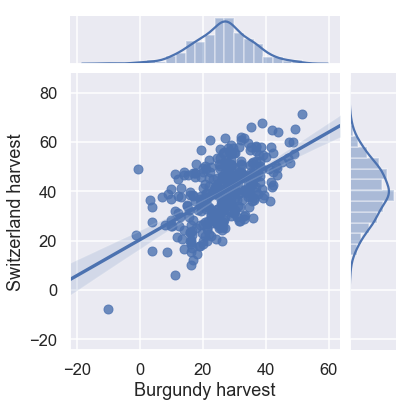

In [57]:
### ANSWER
sns.jointplot(burgundy_switzerland['harvest_x'], burgundy_switzerland['harvest_y'], kind="reg", dropna = True)
plt.xlabel("Burgundy harvest")
plt.ylabel("Switzerland harvest")

**Question**: Correlation is the relationship between two variables: for example, when one variable increases in value, the other increases as well (positive correlation) or when one variable increases in value the other decreases (negative correlation). Variability is how spread the data is or how clustered.

Do you think that harvest date between the two regions is correlated? Positive or negative? How variable is the data? Is the variability constant across harvest dates? What can you learn from your graph?

---
## Curve fitting

In this part of the assignment, you'll practice fitting a model to data. You will use `polyfit()`, `poly1d()`, and  `curve_fit()` functions to create models of grape harvest date, with respect to temperature anomalies and year.

First, watch the video below to learn about `polyfit()`, `poly1d()`, and `curve_fit()`. We will be using "mystery data" for this exercise, which you can download [here](https://github.com/DanChitwood/PlantsAndPython/blob/master/mystery.csv).

Pay attention to the following points in the video:

* How to use `np.polyfit()` to model coefficient values of polynomial functions
* How to use `np.poly1d()` to create a function using `np.polyfit()` coefficients
* How to write a function for a custom model that is not a polynomial
* How to use `curve_fit()` from `scipy` to solve for custom models

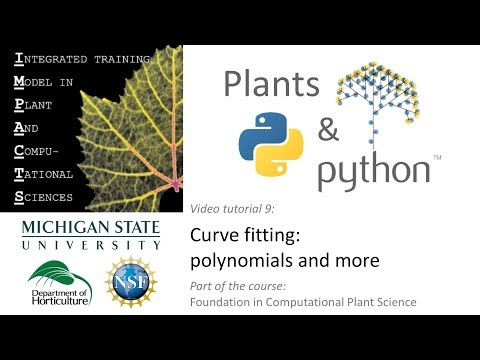

In [58]:
# Imports the functionality that we need to display YouTube videos in a Jupyter notebook.  
# You need to run this cell before you run ANY of the YouTube videos.
from IPython.display import YouTubeVideo

# Watch this video to learn about curve fitting
YouTubeVideo("uvPyJB8vO8c",width=640,height=360)

### Graphing temperature anomaly vs year and harvest date vs temperature anomaly

You have been wondering this whole time: is the temperature increasing with time?

To find out the answer to this question, **below create a scatter plot with "anomaly" on the y-axis and "year" on the x-axis.** Make sure your plots have labels and a title.

In [ ]:
## DO NOT DELETE THE PROVIDED LINES OF CODE
## (they are included to make sure you get decent looking plots)
plt.figure(figsize=(15,4))


# Put your code here


Text(0.5, 1.0, 'Temperature anomaly by year')

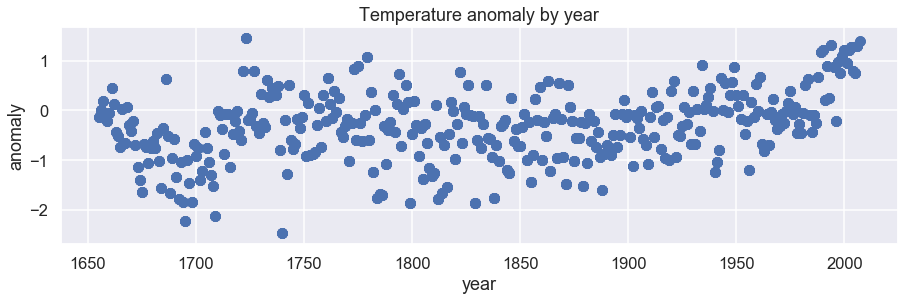

In [59]:
### ANSWER ###

plt.figure(figsize=(15,4))

plt.scatter(x = data['year'], y = data['anomaly'])
plt.xlabel("year")
plt.ylabel("anomaly")
plt.title("Temperature anomaly by year")

You see that indeed, temperature is increasing with time. You want to see if the harvest date is impacted by the temperature anomaly. As above, **below create a scatterplot with "harvest date" on the y-axis and "anomaly" on the x-axis.**  Make sure your plots have labels and a title.

**Hint**: you are plotting lots of data and it will be hard to see the underlying relationship because of overplotting. You can insert the `alpha` argument into the `scatter()` function to create transparency and see your data better. You can start with an alpha as low as 0.1 (e.g., `alpha=0.1`) and adjust it higher if you like.

In [ ]:
## DO NOT DELETE THE PROVIDED LINES OF CODE
## (they are included to make sure you get decent looking plots)
plt.figure(figsize=(8,5))


# Put your code here


Text(0.5, 1.0, 'Harvest date by temperature anomaly')

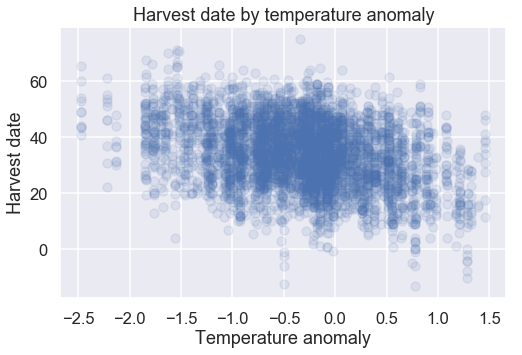

In [60]:
### ANSWER 
plt.figure(figsize=(8,5))
plt.scatter(x = data['anomaly'], y = data['harvest'], alpha=0.1)
plt.xlabel("Temperature anomaly")
plt.ylabel("Harvest date")
plt.title("Harvest date by temperature anomaly")

**Question:** Based on your graph, is there a correaltion between harvest date and temperature anamoly? If so, is it positive or negative?

### Modeling harvest date as a function of temperature anomaly `curve_fit`

You wonder if "harvest" date can be modeled as a function of temperature "anomaly". You even suspect, after plotting "harvest" vs. "anomaly" above, if this relationship might be linear. You are amazed to learn that in fact others suggest this relationship is linear! In the [publication](https://www.clim-past.net/8/1403/2012/cp-8-1403-2012.pdf) where you got this data from, it suggests that others have found that *for every 1C rise in temperature, harvest date is on average 10 days earlier!*

You set out to create a linear model predicting "harvest" as a function of "anomaly" using `curve_fit`. Your first step is to define a linear function, called "harvest_func", that is a linear model. Recall that linear models take the form of `y = m*x + b`, where `y` is `harvest`, `x` is `anomaly`, `m` is the slope, and `b` the intercept.

Define your function "harvest_func" so that the inputs are `anomaly`, `m`, and `b`. It should return `anomaly*m + b`

In [ ]:
# Define your linear function, "harvest func", here:




In [38]:
### ANSWER
def harvest_func(anomaly, m, b):
    return anomaly*m + b

Our next step is to use Scipy's `curve_fit` function to estimate our parameter values. You should review the documentation for `curve_fit`, which you can find [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

We can use the "anomaly" column from our dataset as the "x" values for the function, and the "harvest" column as our "y" values. **Use curve_fit to estimate the values of the parameters in the model: `m` and `b`; and print out the values!** Make sure you include the right import command so that you can use curve_fit!

Once you have your estimated parameter values, **use them to compute the expected values of `harvest` for the range of times spanned in the data.**


In [ ]:
# Import curve_fit() from scipy.optimize
from scipy.optimize import curve_fit

# Use the curve_fit() function here

# Unpack the parameter values

# Use your harvest_func() function and fitted parameter values to get the expected values

# Print out m and b values


In [61]:
### ANSWER
from scipy.optimize import curve_fit

popt, pcov = curve_fit(harvest_func, data["anomaly"], data["harvest"])

m = popt[0]
b = popt[1]

harvest_pred = harvest_func( np.linspace(min(data['anomaly']), max(data['anomaly']), 1000), m, b)

print(m,b)


-5.656973497064281 32.048523825543725


Now that you've used curve_fit to estimate the parameters values and compute the expected values for `harvest`, **plot the actual data and overplot the model values in the cell below.** Make sure you include appropriate labels! Additionally, be sure to plot the actual data and predicted data in contrasting colors that are visible! Remember to use `alpha` argument in the `scatter()` function to help with overplotting and visualization (`alpha=0.1` is a good place to start).

Your graph should look something like the one below:

<img src="https://i.imgur.com/XUodNjp.png" width=600px>

In [ ]:
## DO NOT DELETE THE PROVIDED LINES OF CODE
## (they are included to make sure you get decent looking plots)
plt.figure(figsize=(8,5))


# Put your code here


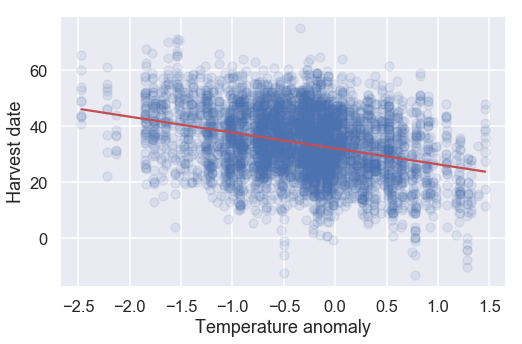

In [62]:
### ANSWER

plt.figure(figsize=(8,5))
plt.scatter(data['anomaly'], data['harvest'], alpha=0.1)
plt.plot( np.linspace(min(data['anomaly']), max(data['anomaly']), 1000), harvest_pred, color="r")
plt.xlabel("Temperature anomaly")
plt.ylabel("Harvest date")
#plt.savefig("curve_fit.png")
plt.show()

**Question:** What do the parameter values tell you about how many days harvest is delayed or comes early for each change in degree Celsius? When there is no temperature anomaly, how many days after August 31st are grapes harvested?

**Question**: Do you think a linear model is appropriate for this data? What do you think about the "fit" of the data to your model?

### Graphing harvest date vs year

Instead of wondering if harvest is related to temperature, you wonder what the overall trend in grape harvests will be with climate change. Afterall, you are betting on increasing temperatures to plant your vineyard in Traverse City!

**Below, make a plot of "harvest" vs. "year". Again, use the `alpha` argument to prevent overplotting and visualize the data better.**

In [ ]:
## DO NOT DELETE THE PROVIDED LINES OF CODE
## (they are included to make sure you get decent looking plots)
plt.figure(figsize=(15,4))


# Put your code here


Text(0.5, 1.0, 'Harvest date by year')

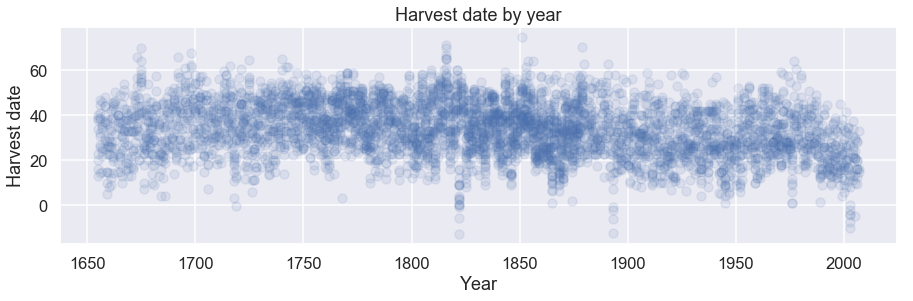

In [63]:
### ANSWER ### 

plt.figure(figsize=(15,4))
plt.scatter(x = data['year'], y = data['harvest'], alpha=0.1)
plt.xlabel("Year")
plt.ylabel("Harvest date")
plt.title("Harvest date by year")

### Modeling harvest date as a function of year using `polyfit`

You doubt that a linear model is appropriate for modeling "harvest" as a function of "year". The response of grapevines in their harvest date to temperature is linear, but you remember that the increases in the earth's temperature are like a "hockey stick", sharply going upwards in a non-linear fashion.

You decide that you'll fit a polynomial function, using the functions `polyfit` (to estimate parameters) and `poly1d` (to create a function to model predicted results) to model "harvest" as a funciton of "year".

In the cell below: 

**1) estimate polynomial parameters (you must decide on the order of the polynomial function) using `polyfit`**

**2) create a function with these parameters using `poly1d` to create expected values for "harvest" for the minimum and maximum values of "year" in the dataset**

**3) plot out the actual data along with the modeled data values in contrasting colors.**

**4) print out the parameter values**


In [ ]:
### Put your code here




[-2.26736936e-04  7.98862301e-01 -6.66642721e+02]


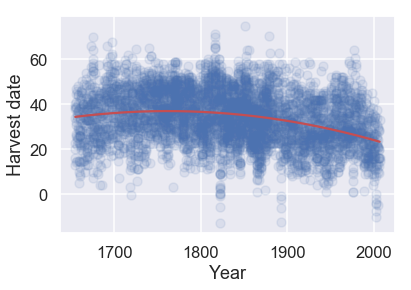

In [65]:
### ANSWER ### 

import numpy as np

N = np.polyfit(data['year'], data['harvest'],2)

func = np.poly1d(N)
plt.scatter(data['year'], data['harvest'], alpha=0.1)
plt.plot(np.linspace(min(data['year']), max(data['year']), 1000),func(np.linspace(min(data['year']), max(data['year']), 1000)), color="r")
plt.xlabel("Year")
plt.ylabel("Harvest date")

print(N)


Explain why you chose the order of the polynomial function that you did.

____
That's all for this lesson! If you are not in the course and are using these materials remotely and would like the answers, feel free to email Dr. Dan Chitwood (Michigan State University, Depts. Horticulture and Computational Mathematics, Science, & Engineering) at dhchitwood [ at ] gmail [ dot ] com